<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Do_an_cuoi_ky_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 #open cv
import os
import matplotlib.pyplot as plt


In [ ]:
# scaling all images to 47 * 62 using OpenCV resize function
i = 0
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        filename = 'drive/My Drive/Data/' + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (216,216), interpolation = cv2.INTER_AREA)
        print(i)
        i+=1

In [7]:
# building an array of images and finding its shape.
X_images = []
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        filename = 'drive/My Drive/Data/' + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
        X_images.append(img)
X_images = np.asarray(X_images)
X_images.shape

(830, 67, 42)

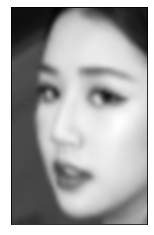

In [8]:
plt.imshow(X_images[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [9]:
y_train = []
for imgfolder in os.listdir('drive/My Drive/Data/'):
    for filename in os.listdir('drive/My Drive/Data/' + imgfolder):
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(830,)

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_images, y_train, test_size = 0.2, random_state =42)

In [ ]:
#Build array of images for Test/Validation dataset
X_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    i = 0
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
         if(filename.endswith('.jpg')):
                filename = 'drive/My Drive/Image Processing/Val/' + imgfolder + '/' + filename
                #print(filename)
                img = cv2.imread(filename,0)
                
                img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
                X_test.append(img)
                
                i+=1
    
X_test = np.asarray(X_test)
X_test.shape

(88, 67, 42)

In [ ]:
#Building a 1D array of test labels
y_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
        y_test.append(imgfolder)
y_test = np.asarray(y_test)
y_test.shape

(88,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


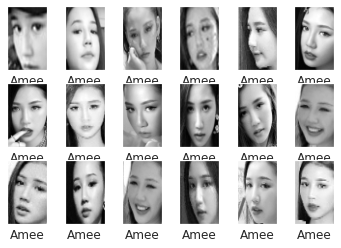

In [14]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

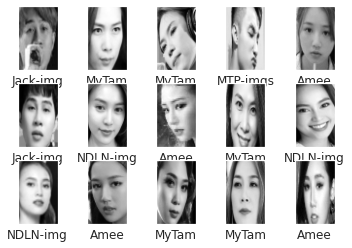

In [16]:
#display test images and labels to make sure they lineup correctly
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=Y_test[i])

In [17]:
from sklearn.decomposition import PCA as RandomizedPCA

# SVC Recoginization

In [18]:

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [19]:
#flatten images.
X_data = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [20]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [33]:
# doing cross validation to tune the params of SVC

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, Y_train)
print(grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. Estimator expected <= 2.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. Estimator expected <= 2.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with dim 3. Estimator expected <= 2.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit 

ValueError: ignored

In [22]:
grid.best_score_

0.7144578313253012

In [23]:
# pick the best model from the grid search above and use it to classify the test dataset
model = grid.best_estimator_
yfit = model.predict(X_test)

In [24]:
print(yfit)

['Jack-img' 'MyTam' 'MyTam' 'MTP-imgs' 'Amee' 'Jack-img' 'NDLN-img' 'Amee'
 'MyTam' 'NDLN-img' 'NDLN-img' 'Amee' 'MyTam' 'MyTam' 'Amee' 'MyTam'
 'MyTam' 'MyTam' 'NDLN-img' 'MTP-imgs' 'MTP-imgs' 'Amee' 'MyTam'
 'Jack-img' 'MyTam' 'MyTam' 'Amee' 'MTP-imgs' 'NDLN-img' 'MyTam' 'MyTam'
 'MyTam' 'Amee' 'MyTam' 'Amee' 'MTP-imgs' 'MTP-imgs' 'NDLN-img' 'Amee'
 'Amee' 'MTP-imgs' 'Jack-img' 'Amee' 'Jack-img' 'MyTam' 'Amee' 'NDLN-img'
 'Jack-img' 'NDLN-img' 'MyTam' 'Jack-img' 'Jack-img' 'MyTam' 'MyTam'
 'MTP-imgs' 'MTP-imgs' 'NDLN-img' 'Jack-img' 'MTP-imgs' 'MyTam' 'NDLN-img'
 'NDLN-img' 'Jack-img' 'Amee' 'Jack-img' 'MyTam' 'MyTam' 'MyTam' 'MyTam'
 'MyTam' 'NDLN-img' 'Amee' 'MyTam' 'MyTam' 'Amee' 'NDLN-img' 'MyTam'
 'NDLN-img' 'Amee' 'Amee' 'NDLN-img' 'MTP-imgs' 'Jack-img' 'MyTam' 'MyTam'
 'MyTam' 'MyTam' 'Amee' 'Amee' 'Amee' 'MTP-imgs' 'MyTam' 'MyTam' 'Amee'
 'MyTam' 'MyTam' 'MyTam' 'MyTam' 'MTP-imgs' 'MyTam' 'Jack-img' 'NDLN-img'
 'Jack-img' 'Amee' 'Amee' 'Amee' 'NDLN-img' 'MyTam' 'MTP-imgs' 'Ja

In [25]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

In [27]:
classification_report(yfit, Y_test)

'              precision    recall  f1-score   support\n\n        Amee       1.00      1.00      1.00        36\n    Jack-img       1.00      1.00      1.00        26\n    MTP-imgs       1.00      1.00      1.00        19\n       MyTam       1.00      1.00      1.00        59\n    NDLN-img       1.00      1.00      1.00        26\n\n    accuracy                           1.00       166\n   macro avg       1.00      1.00      1.00       166\nweighted avg       1.00      1.00      1.00       166\n'

In [29]:
accuracy_score(yfit, Y_test)

1.0